# I. Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing

# II. Chuẩn bị data

#### Load data

In [2]:
data_path = './dataset/trainDataset.csv'
df = pd.read_csv(data_path)

#### Phân tích data

In [3]:
len(df)

12165

Dữ liệu bao gồm
- id: mã id của mỗi bản ghi
- season: mùa (1: mùa xuân, 2: mùa hè, 3: mùa thu, 4: mùa đông)
- yr: năm (0: 2011, 1: 2012)
- mnth: tháng (1 -> 12)
- hr: giờ (0 -> 23)
- holiday: ngày nghỉ lễ (trích rút từ http://dchr.dc.gov/page/holiday-schedule)
- weekday: ngày trong tuần
- workingday: nếu không phải cuối tuần hay ngày lễ thì là 1 <-> ngược lại là 0
- weathersit:
-- 1: trời trong, ít mây, nhiều mây, có mây
-- 2: sương mù + nhiều mây, sương mù + mây rải rác, sương mù + vài đám mây, sương mù
-- 3: tuyết nhẹ, mưa nhẹ + giông bão + mây rải rác, mưa nhẹ + mây rải rác
-- 4: mưa lớn + mưa đá, giông bão + sương mù, tuyết + sương mù
- temp: nhiệt độ môi trường (tính theo độ C) - đã được chuẩn hóa chia cho 41 (max)
- atemp: nhiệt độ theo cảm nhận (tính theo độ C) - đã được chuẩn hóa chia cho 50 (max)
- hum: độ ẩm - đã được chuẩn hóa chia cho 100 (max)
- cnt: số lượng xe đạp thuê

In [5]:
df.tail()

,id,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
12160,12160,2,1,4,9,0,5,1,Weather good,0.46,0.4545,0.88,0.0896,359
12161,12161,2,1,5,17,0,5,1,Weather good,0.66,0.6212,0.34,0.1343,812
12162,12162,3,0,8,12,0,3,1,Weather good,0.80,0.7273,0.43,0.2836,189
12163,12163,1,0,2,7,0,2,1,Weather good,0.24,0.1970,0.65,0.4179,100
12164,12164,4,1,10,8,0,4,1,Weather medium,0.52,0.5000,0.83,0.1642,779


In [784]:
df.describe()

,id,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,6082.000000,2.510399,0.501767,6.562351,11.579038,0.027949,3.004603,0.681381,1.426634,0.498058,0.476826,0.627472,0.189457,191.237649
std,3511.877347,1.105498,0.500017,3.430356,6.925790,0.164834,2.010245,0.465960,0.639961,0.193085,0.172369,0.193316,0.122025,182.900931
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,3041.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,6082.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,145.000000
75%,9123.000000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.253700,282.000000
max,12164.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.984800,1.000000,0.850700,976.000000


###### Trong từng cột

Xem phân phối của từng cột một

<AxesSubplot:>

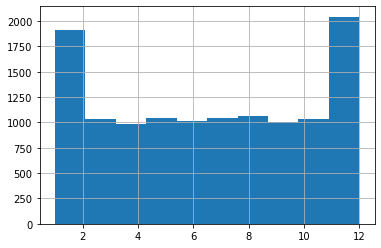

In [785]:
df['mnth'].hist()

Kiểm tra xem có dữ liệu trống không

In [786]:
df[pd.isnull(df).any(axis=1)].head()

,id,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


###### Giữa các cột với nhau

Sự tương quan giữa từng cột

In [787]:
df.corr()

,id,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
id,1.000000,-0.003323,0.011902,-0.004192,-0.000969,-0.011641,-0.001304,-0.013339,-0.003586,-0.010314,-0.009034,0.008758,0.006970,0.001353
season,-0.003323,1.000000,-0.001111,0.827319,-0.007701,-0.006107,0.003567,0.010901,-0.025561,0.308525,0.315714,0.149357,-0.150996,0.183018
yr,0.011902,-0.001111,1.000000,-0.003144,-0.001957,0.001396,-0.003280,-0.003934,-0.022653,0.042773,0.041106,-0.089438,-0.005550,0.260010
mnth,-0.004192,0.827319,-0.003144,1.000000,-0.004738,0.024106,0.017173,-0.005417,-0.002606,0.197423,0.203675,0.160911,-0.135482,0.125193
hr,-0.000969,-0.007701,-0.001957,-0.004738,1.000000,-0.002439,-0.004006,0.006454,-0.027622,0.143827,0.140352,-0.277284,0.133948,0.391127
holiday,-0.011641,-0.006107,0.001396,0.024106,-0.002439,1.000000,-0.096900,-0.247969,-0.017189,-0.026088,-0.029282,-0.005858,0.002460,-0.033390
weekday,-0.001304,0.003567,-0.003280,0.017173,-0.004006,-0.096900,1.000000,0.036760,0.011318,-0.004416,-0.010801,-0.033904,0.016329,0.022613
workingday,-0.013339,0.010901,-0.003934,-0.005417,0.006454,-0.247969,0.036760,1.000000,0.042079,0.052608,0.051251,0.010260,-0.016068,0.030143
weathersit,-0.003586,-0.025561,-0.022653,-0.002606,-0.027622,-0.017189,0.011318,0.042079,1.000000,-0.105639,-0.109531,0.419205,0.018128,-0.146495
temp,-0.010314,0.308525,0.042773,0.197423,0.143827,-0.026088,-0.004416,0.052608,-0.105639,1.000000,0.988169,-0.075808,-0.023870,0.402784


Hiển thị hình ảnh sự tương quan

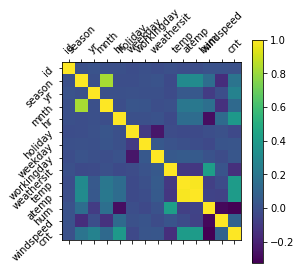

In [788]:
plt.matshow(df.corr())
continuous_feature = df.describe().columns
plt.xticks(range(len(continuous_feature)), continuous_feature, rotation = 45)
plt.yticks(range(len(continuous_feature)), continuous_feature, rotation = 45)
plt.colorbar()
plt.show()

### Làm giàu dữ liệu

Biến đổi One Hot

In [789]:
def change_one_hot(dt_tmp):
    dt_tmp['weathersit'] = dt_tmp['weathersit'].map({1: 'Weather good', 2: 'Weather medium', 3:'Weather Not Good', 4:'Weather danger'})
    dt_tmp = pd.get_dummies(dt_tmp, columns=['weathersit'], prefix='', prefix_sep='')
    return dt_tmp

### Loại bỏ thuộc tính

In [790]:
def drop_feature(df):
    df = df.drop(['temp', 'id'], axis = 1)
    return df

### Chuẩn hóa

#### Min max scaler

In [791]:
min_max_scaler = MinMaxScaler()
normalize_mm = ['mnth','hr','weekday']

Trên tập train

In [792]:
x = df[normalize_mm].values
x_scaled = min_max_scaler.fit_transform(x)
normalized_features = pd.DataFrame(x_scaled, columns=normalize_mm, index = df.index)
df[normalize_mm] = normalized_features

Trên tập còn lại

In [793]:
def minmax(df_tmp):
    x = df_tmp[normalize_mm].values
    x_scaled = min_max_scaler.transform(x)
    normalized_features = pd.DataFrame(x_scaled, columns=normalize_mm, index = df_tmp.index)
    return normalized_features

#### Standard Scaler

In [794]:
standard_scaler = StandardScaler()
normalized_ss = ['season']

In [795]:
x = df[normalized_ss].values
x_scaled = standard_scaler.fit_transform(x)
normalized_features = pd.DataFrame(x_scaled, columns=normalized_ss, index = df.index)
df[normalized_ss] = normalized_features

In [796]:
def standard(df_tmp):
    x = df_tmp[normalized_ss].values
    x_scaled = standard_scaler.transform(x)
    normalized_features = pd.DataFrame(x_scaled, columns = normalized_ss, index = df_tmp.index)
    return normalized_features

### Chia dữ liệu

Chia nhãn và dữ liệu train

In [797]:
df = change_one_hot(df)
df = drop_feature(df)

In [798]:
feature_data = df.drop(['cnt'], axis = 1)
label_data = df['cnt']

Chia tập dữ liệu train và validation

In [799]:
x_train, x_test, y_train, y_test = train_test_split(feature_data, label_data, test_size = 0.01, random_state = 50)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12043, 14), (122, 14), (12043,), (122,))

# III. Model

In [800]:
model = XGBRegressor()

# IV. Train

In [801]:
x_train

,season,yr,mnth,hr,holiday,weekday,workingday,atemp,hum,windspeed,Weather Not Good,Weather danger,Weather good,Weather medium
11792,1.347504,0,1.000000,0.086957,0,0.166667,1,0.3485,0.87,0.0000,0,0,1,0
3559,1.347504,0,0.909091,0.347826,0,0.500000,1,0.3485,0.93,0.0000,0,0,1,0
1912,0.442897,0,0.636364,0.304348,0,0.833333,1,0.5758,0.83,0.0000,0,0,1,0
12059,1.347504,0,0.909091,0.217391,0,0.666667,1,0.3030,0.71,0.3284,1,0,0,0
3505,-0.461710,0,0.272727,0.521739,0,0.333333,1,0.5152,0.64,0.0896,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8324,-0.461710,0,0.363636,0.043478,0,0.500000,1,0.5455,0.83,0.1940,1,0,0,0
10206,-1.366317,0,0.181818,0.260870,0,0.500000,1,0.2121,0.55,0.2537,0,0,1,0
6253,1.347504,0,0.818182,0.391304,0,0.500000,1,0.5152,0.88,0.4478,0,0,0,1
10123,-1.366317,0,0.090909,0.782609,0,1.000000,0,0.2576,0.38,0.3284,0,0,1,0


In [814]:
solution = model.fit(x_train, y_train)

Tính xem y_test bằng bao nhiêu

In [803]:
solution.predict(x_test)

array([ 19.208984  , 175.94589   ,   9.315122  , 509.19324   ,
       265.5854    ,  73.77536   ,  89.18094   ,  46.978497  ,
       153.88129   , 252.27805   , 376.39542   , 471.6914    ,
       236.62166   , 168.4762    ,  75.12524   ,  15.532818  ,
         7.4201    , 100.57254   ,  24.067614  ,   7.1847134 ,
        93.85168   ,  10.442086  , 230.32994   , 242.37053   ,
       163.86174   ,  37.412025  ,   5.567876  , 406.82455   ,
        63.85203   ,  68.00085   , 128.65038   , 214.99187   ,
       144.6234    ,  78.37969   ,  87.4698    ,  -1.1321554 ,
       202.82079   , 382.76492   ,  99.21486   , 673.7435    ,
       156.46698   ,  19.102701  , 262.99704   , 154.54431   ,
       237.4131    , 184.00345   , 240.07103   , 109.98332   ,
       384.91156   ,  53.701145  ,  53.361633  ,  93.59213   ,
       228.21976   ,  80.59782   , 308.60376   , 209.38512   ,
        43.992767  ,  24.643053  ,  54.951813  , 388.50098   ,
       538.538     , 273.16495   ,  28.746979  , 245.12

Tính mean sque error

In [815]:
mean_squared_error(solution.predict(x_test), y_test)

1699.6948347651128

# V.Submit kaggle

load data

In [805]:
submission_feature_path = './dataset/submissionDataset.csv'
df_submission_feature = pd.read_csv(submission_feature_path)

Chuẩn hóa dữ liệu

In [806]:
df_submission_feature = change_one_hot(df_submission_feature)
df_submission_feature = drop_feature(df_submission_feature)

Tính

In [807]:
feature_data_submission = df_submission_feature.drop(['cnt'], axis = 1)
feature_data_submission[normalize_mm] = minmax(feature_data_submission)
feature_data_submission[normalized_ss] = standard(feature_data_submission)
label = solution.predict(feature_data_submission)

In [808]:
for i in range (0, label.shape[0]):
    if (label[i]<0):
        label[i] = 0

In [809]:
label

array([344.26544 ,  92.59576 ,   8.392033, ..., 574.0367  , 285.814   ,
        86.49035 ], dtype=float32)

Ghi kết quả vào tập submisstion

In [810]:
submission_label_path = './dataset/submission.csv'
df_submission_label = pd.read_csv(submission_label_path)
df_submission_label['cnt'] = label

In [811]:
df_submission_label.head()

,id,cnt
0,0,344.265442
1,1,92.595757
2,2,8.392033
3,3,564.947021
4,4,7.648729


Ghi dữ liệu ra file

In [812]:
df_submission_label.to_csv(submission_label_path, index = False)